In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [34]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [35]:
# checking the dataset
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# cheacking the data information
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
churn_data.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [38]:
churn_data.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

In [39]:
churn_data.CreditScore.isna().any()

False

In [40]:
churn_data.drop(labels=['CustomerId','Surname'],
                axis=1,
                inplace=True)

In [41]:
churn_data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
churn_data.Geography.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [43]:
churn_data.Gender.value_counts(dropna=False)

Male      5457
Female    4543
Name: Gender, dtype: int64

In [44]:
churn_data_cleaned = pd.get_dummies(churn_data, 
                                    prefix=['Geo','Gen'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int) 

In [45]:
churn_data_cleaned

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


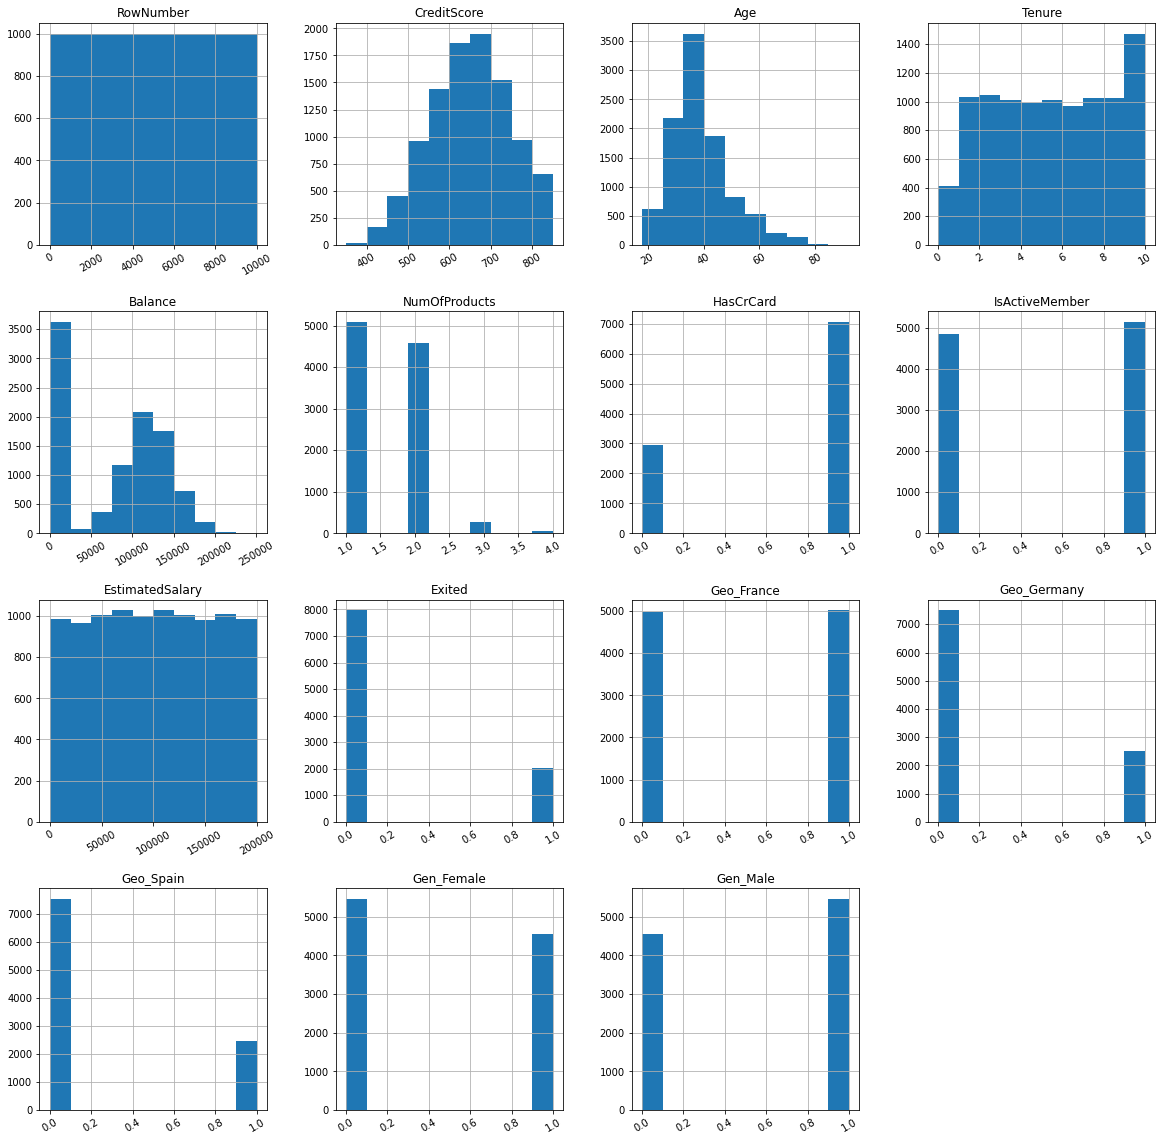

In [46]:
churn_data_cleaned.hist(bins=10,
                        figsize=(20,20),
                        xrot=30);

In [54]:
labels=churn_data_cleaned.columns
print(labels)
scaler=preprocessing.StandardScaler()
scaled_churn_data_cleaned=scaler.fit_transform(churn_data_cleaned)

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Gen_Female', 'Gen_Male'],
      dtype='object')


In [55]:
scaled_churn_data_cleaned=pd.DataFrame(scaled_churn_data_cleaned)
scaled_churn_data_cleaned.columns=labels

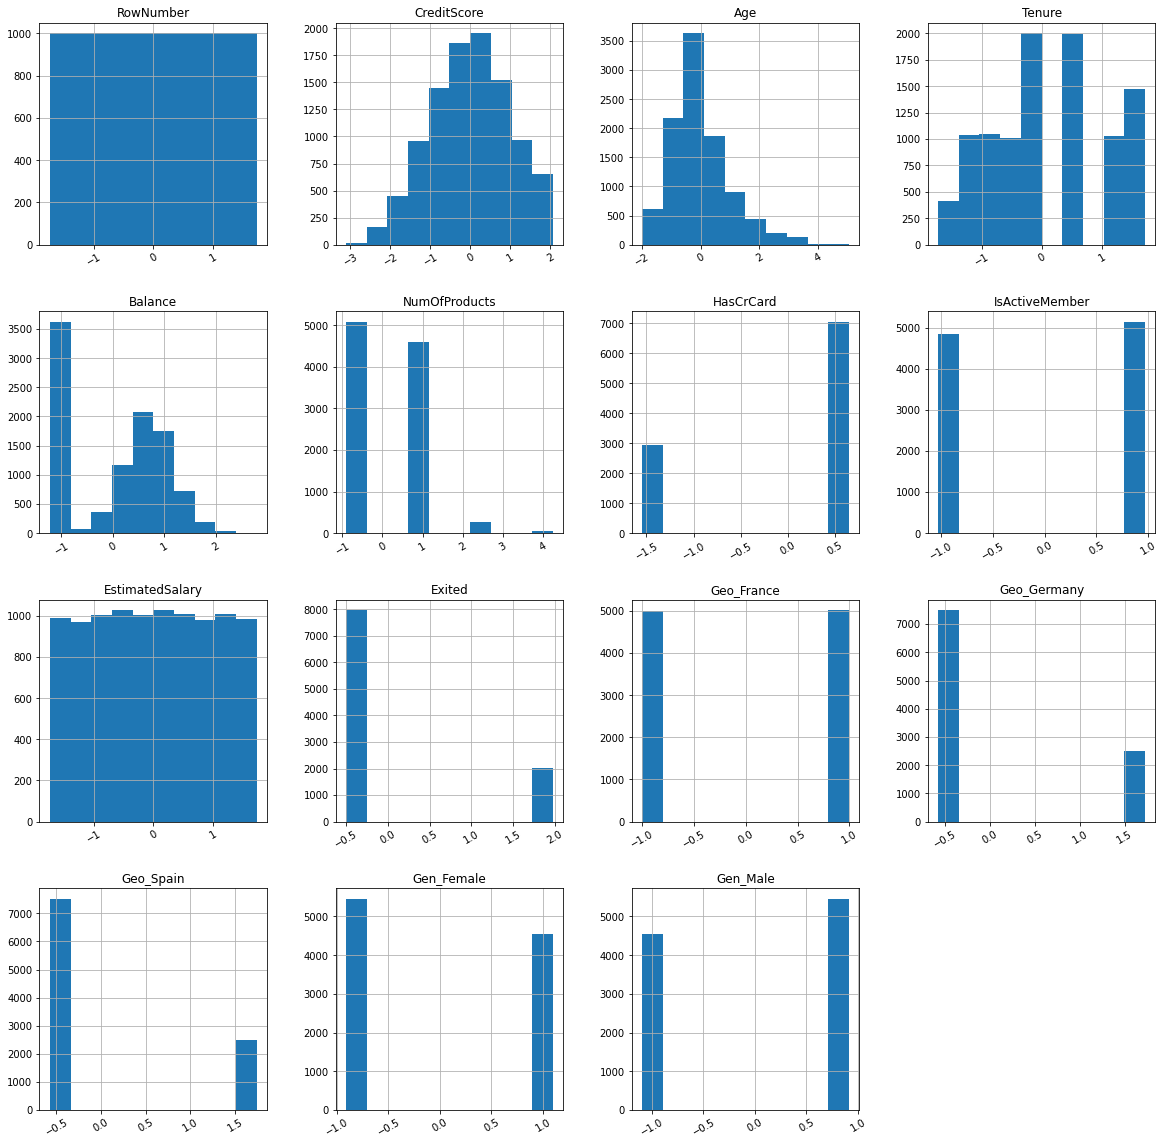

In [57]:
scaled_churn_data_cleaned.hist(bins=10,
                               figsize=(20,20),
                               xrot=30);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

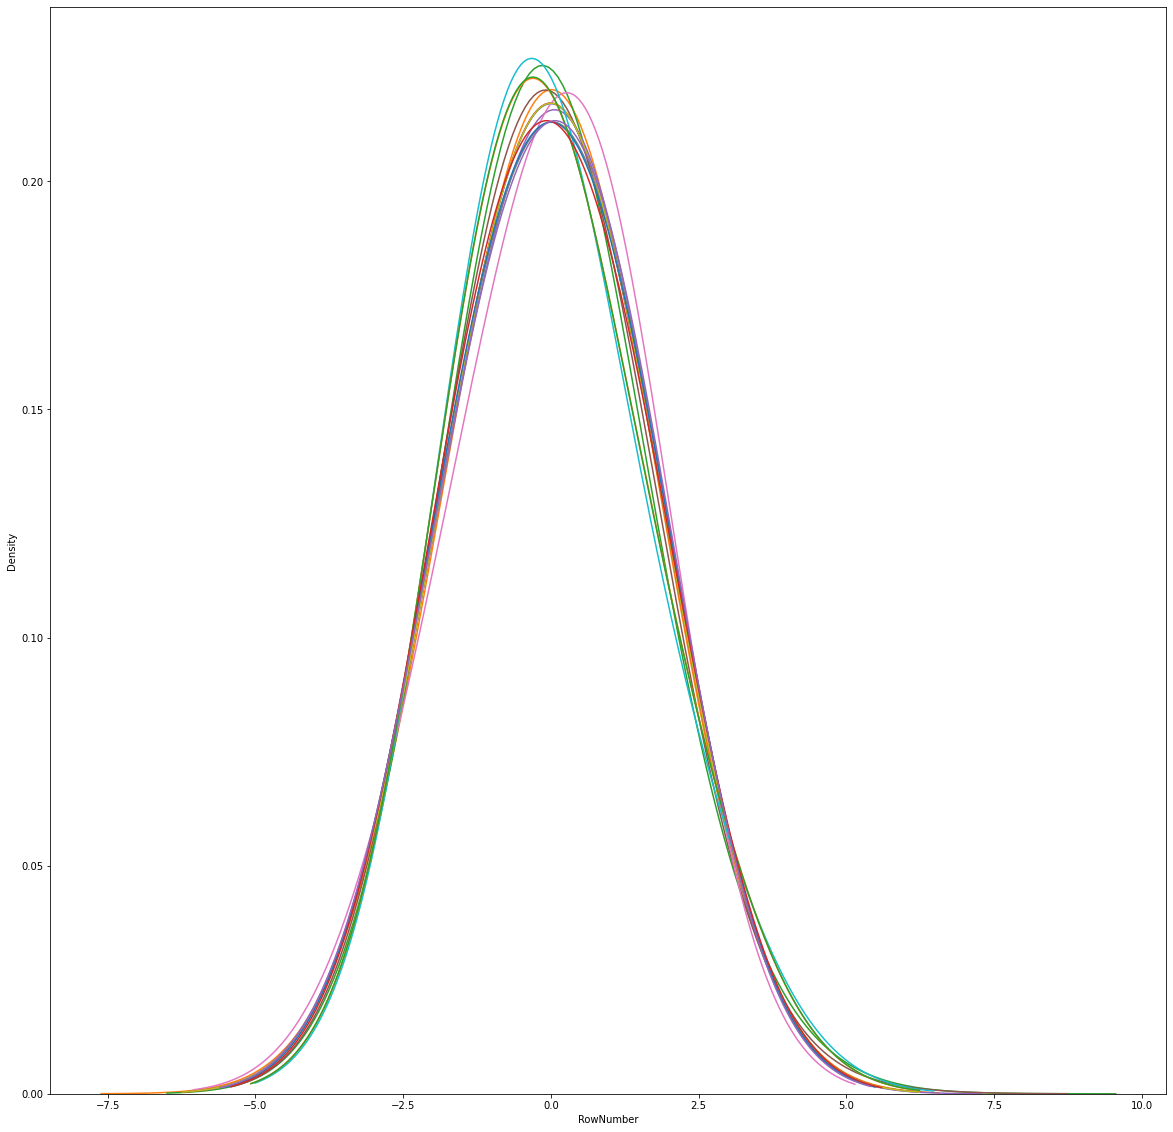

In [60]:
fig,ax = plt.subplots(1,1,figsize=(20,20));
for i in scaled_churn_data_cleaned.columns:
    sns.kdeplot(scaled_churn_data_cleaned[i],
                 label=[i],
                 bw=1.5,
                 ax=ax);

In [61]:
corr=scaled_churn_data_cleaned.corr()

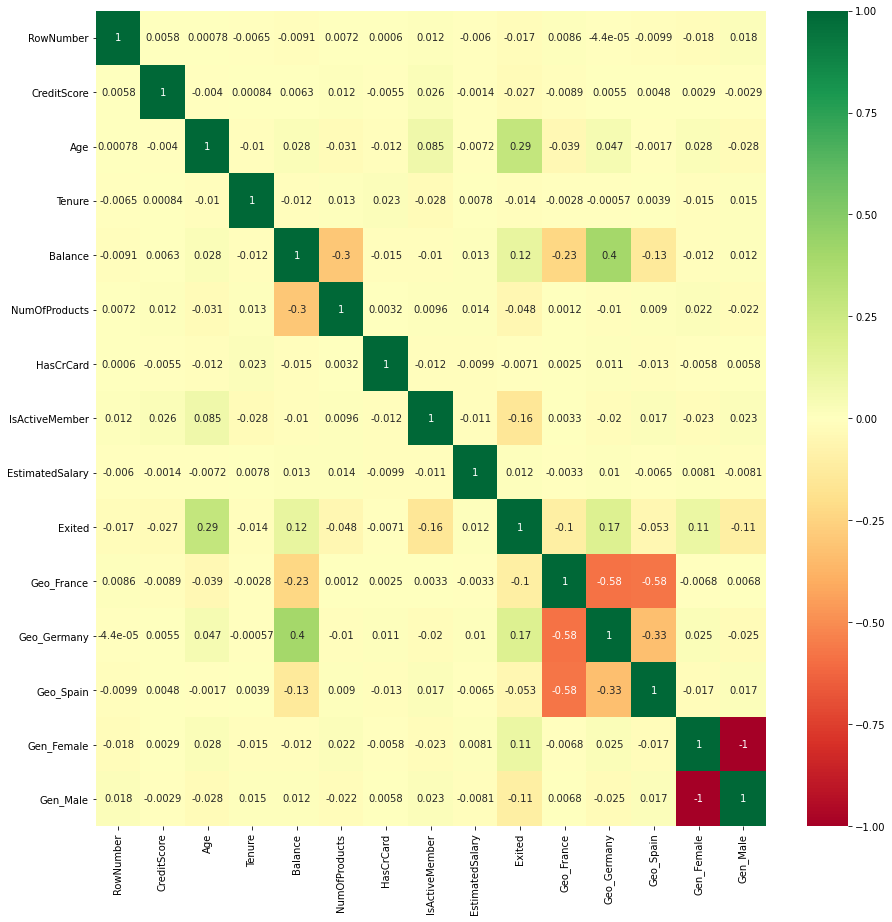

In [66]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdYlGn',ax=ax)

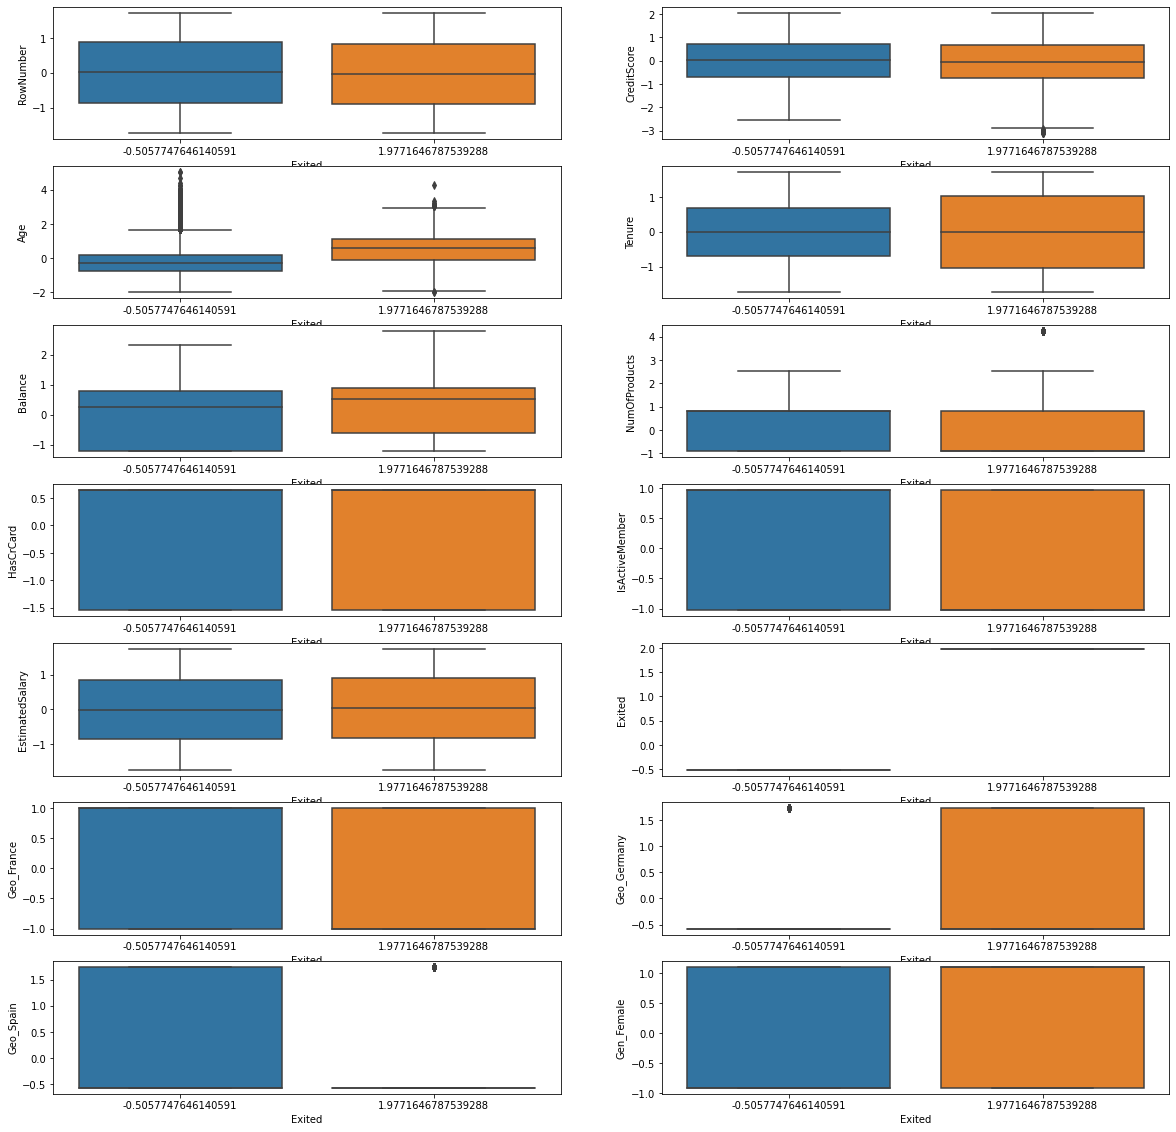

In [67]:
nr = 7
nc = 2
fig,ax=plt.subplots(nrows=nr,ncols=nc,figsize=(20,20))
i = 0
for j in range(nr):
  for k in range(nc):
    axes=ax[j,k]

    sns.boxplot(x=scaled_churn_data_cleaned['Exited'],
                y=scaled_churn_data_cleaned.iloc[:,i],
                ax=axes)
    i+=1

In [69]:
scaled_churn_data_cleaned = scaled_churn_data_cleaned.drop('Exited',axis=1)

In [70]:
scaled_churn_data_cleaned.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geo_France',
       'Geo_Germany', 'Geo_Spain', 'Gen_Female', 'Gen_Male'],
      dtype='object')

In [72]:
from sklearn.decomposition import PCA
n_comp = 2
pca=PCA(n_components=n_comp)
principal_components=pca.fit_transform(scaled_churn_data_cleaned)
len(principal_components)

10000

In [73]:
pc_df=pd.DataFrame(principal_components,
                  columns=['principal_components_%s'%(i+1) for i in range(n_comp)],
                  index=range(1,len(principal_components)+1))
print(pc_df)

       principal_components_1  principal_components_2
1                    1.429276               -1.545088
2                    1.549292                0.513547
3                    1.589160               -0.931278
4                    1.533453               -1.843924
5                    1.557401                0.860555
...                       ...                     ...
9996                -1.413505               -1.600610
9997                -1.534420               -0.917651
9998                 1.287976               -1.625879
9999                -1.026527                1.563093
10000                1.389566               -0.638573

[10000 rows x 2 columns]


In [74]:
input_components=pc_df
output_components=churn_data.Exited
print(input_components.shape,output_components.shape)
final_df=pd.concat([input_components,output_components],axis=1)

(10000, 2) (10000,)


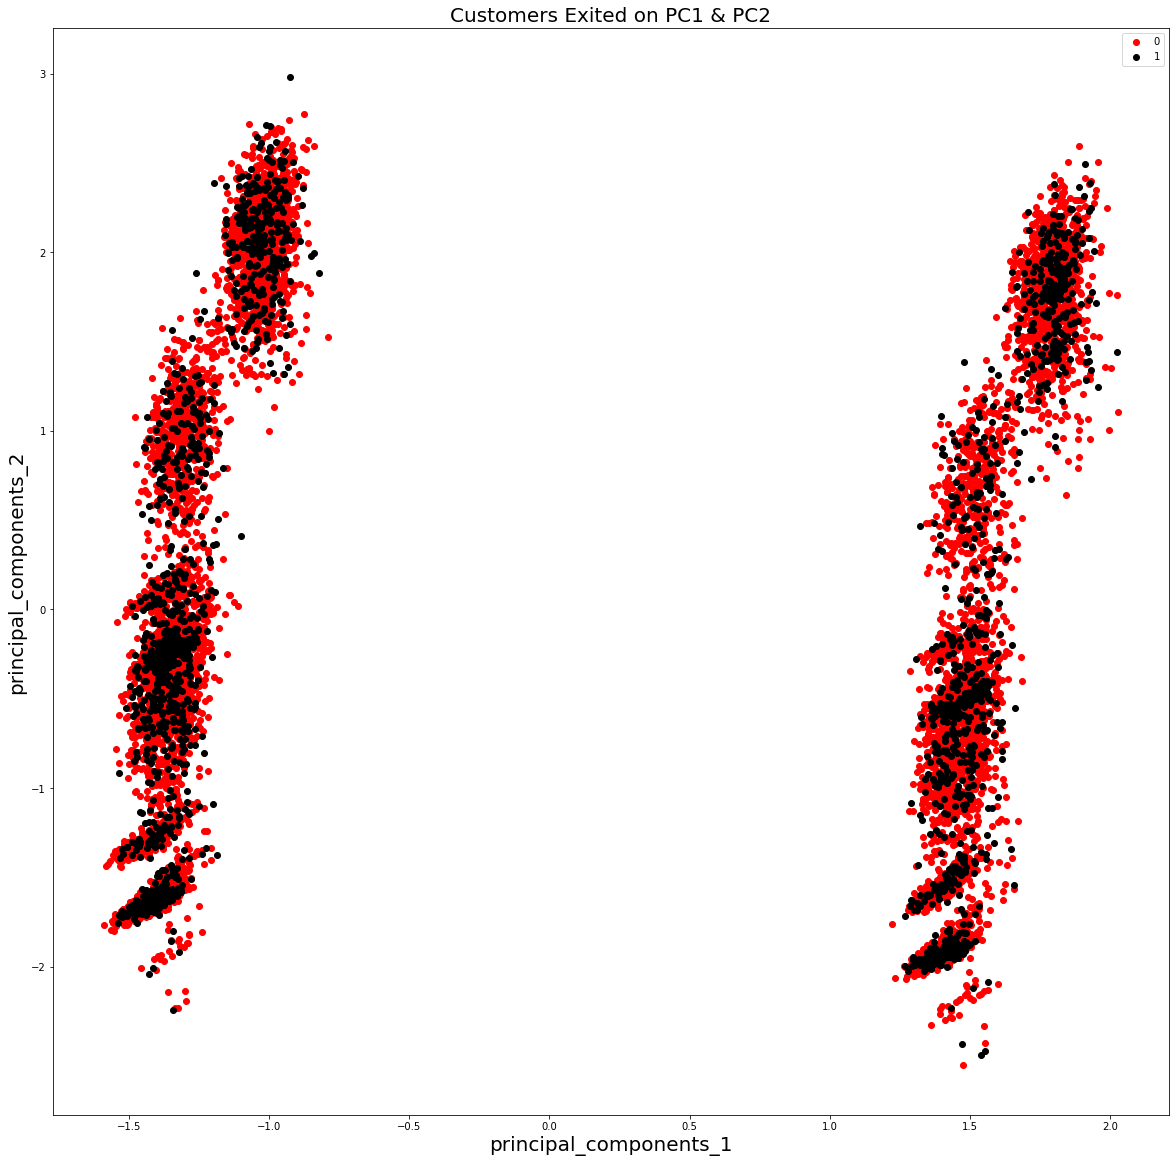

In [75]:
fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_xlabel('principal_components_1',fontsize=20)
ax.set_ylabel('principal_components_2',fontsize=20)
ax.set_title('Customers Exited on PC1 & PC2',fontsize=20)

Targets=[0,1]
colors=['r','k']

for target,color in zip(Targets,colors):
    index_no_target=final_df['Exited']==target
    ax.scatter(final_df.loc[index_no_target,'principal_components_1'],
               final_df.loc[index_no_target,'principal_components_2'],
              c=color)
    ax.legend(Targets)
    ax.grid()

In [76]:
pca.explained_variance_ratio_

array([0.14345098, 0.13317425])

In [77]:
n_comp=10
pca_10=PCA(n_components=n_comp)
pca10_comp=pca_10.fit_transform(scaled_churn_data_cleaned)
df_PCA_10=pd.DataFrame(pca10_comp,
                       columns=['Principal_component_%s'%(i+1) for i in range(n_comp)],
                      index=range(1,len(pca10_comp)+1))
print(df_PCA_10)

       Principal_component_1  ...  Principal_component_10
1                   1.429276  ...               -1.241719
2                   1.549292  ...               -0.172330
3                   1.589160  ...                0.333459
4                   1.533453  ...                0.235791
5                   1.557401  ...               -1.426750
...                      ...  ...                     ...
9996               -1.413505  ...               -0.226063
9997               -1.534420  ...                0.674673
9998                1.287976  ...                1.795764
9999               -1.026527  ...               -0.518085
10000               1.389566  ...               -0.236416

[10000 rows x 10 columns]


In [78]:
sum(pca_10.explained_variance_ratio_)

0.8969132088545436

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_PCA_10,
                                               output_components,
                                               test_size=0.4,
                                               random_state=0)

In [80]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:, 1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)

print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(model.__class__.__name__+" score is  %.2f" % model.score(x_test,y_test))

Train/Test split results:
LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.479
LogisticRegression auc is 0.677
LogisticRegression score is  0.79


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

score=model.score(x_test,y_test)
print(score)

0.76125


In [82]:
cross_val_score(model,x_train,y_train,cv=10)

array([0.76      , 0.75166667, 0.75333333, 0.77166667, 0.76      ,
       0.76166667, 0.74666667, 0.76166667, 0.74666667, 0.775     ])

In [83]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,
                            bootstrap=True,
                            max_features='sqrt')
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
print(model.score(x_test,y_test))

0.8375
